<a href="https://colab.research.google.com/github/MominaRz/MEC_20S19831/blob/main/Leukaemia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#making dairectory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#kaggle Api to install dataset
!kaggle datasets download -d andrewmvd/leukemia-classification

100% 867M/867M [00:45<00:00, 23.7MB/s]
100% 867M/867M [00:45<00:00, 20.0MB/s]


In [ ]:
#unzippind data
import zipfile
zip_ref = zipfile.ZipFile('/content/leukemia-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#impoting important laibraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/C-NMC_Leukemia/training_data/fold_0',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/C-NMC_Leukemia/training_data/fold_1',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 3527 files belonging to 2 classes.
Found 3581 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
#compling model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#traing model
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
111/111 [==============================] - 49s 307ms/step - loss: 2.6206 - accuracy: 0.7332 - val_loss: 1.3272 - val_accuracy: 0.4499
Epoch 2/10
111/111 [==============================] - 34s 302ms/step - loss: 0.6585 - accuracy: 0.7409 - val_loss: 0.6214 - val_accuracy: 0.6833
Epoch 3/10
111/111 [==============================] - 34s 298ms/step - loss: 0.5864 - accuracy: 0.7389 - val_loss: 2.9096 - val_accuracy: 0.3901
Epoch 4/10
111/111 [==============================] - 34s 298ms/step - loss: 0.5645 - accuracy: 0.6751 - val_loss: 0.5167 - val_accuracy: 0.6814
Epoch 5/10
111/111 [==============================] - 24s 210ms/step - loss: 0.5288 - accuracy: 0.6785 - val_loss: 0.4764 - val_accuracy: 0.6858
Epoch 6/10
111/111 [==============================] - 24s 206ms/step - loss: 0.5237 - accuracy: 0.7624 - val_loss: 0.9601 - val_accuracy: 0.7266
Epoch 7/10
111/111 [==============================] - 18s 159ms/step - loss: 0.4642 - accuracy: 0.7647 - val_loss: 0.3982 - val_ac

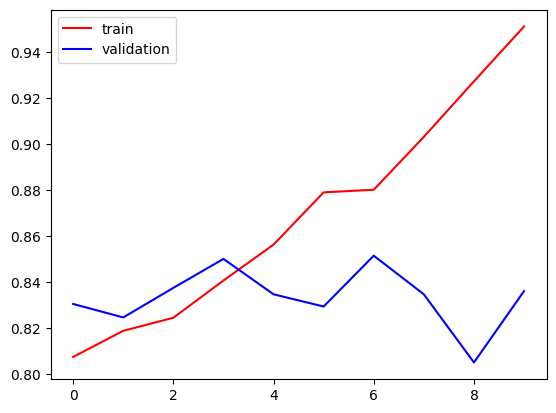

In [ ]:
import matplotlib.pyplot as plt

#ploting accuracy chat
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

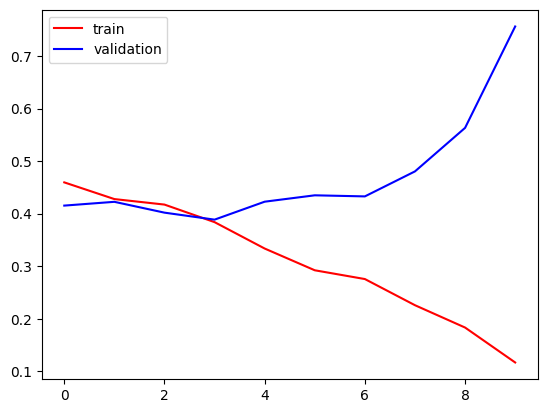

In [ ]:
#ploting loss chat
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

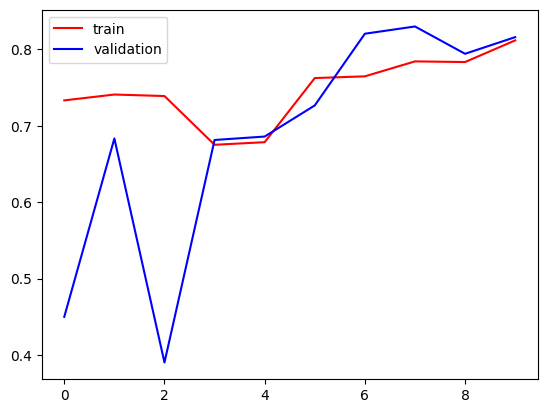

In [ ]:
import matplotlib.pyplot as plt

#ploting accuracy chat after overfing solution
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

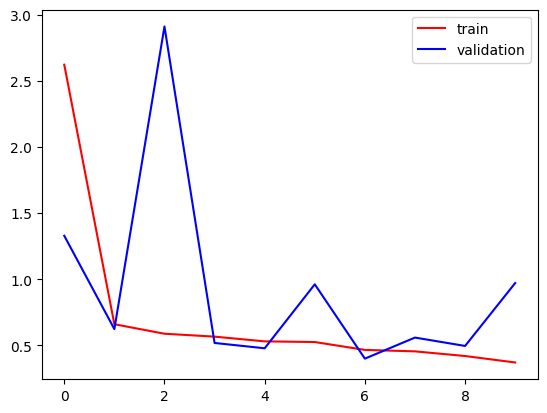

In [ ]:
#ploting loss chat after overfing solution
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# implementing pretrain model

In [ ]:
#making directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#kaggle API
!kaggle datasets download -d andrewmvd/leukemia-classification

 99% 857M/867M [00:20<00:00, 65.9MB/s]
100% 867M/867M [00:20<00:00, 44.8MB/s]


In [ ]:
#unzipping the data
import zipfile
zip_ref = zipfile.ZipFile('/content/leukemia-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#importing important laibraries
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
#pertarim model VGG16
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model = Sequential()

#Adding dense layer
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/C-NMC_Leukemia/training_data/fold_0',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/C-NMC_Leukemia/training_data/fold_1',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 3527 files belonging to 2 classes.
Found 3581 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#compliling domel
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#traing model
history = model.fit(train_ds, epochs=10, validation_data = validation_ds)

Epoch 1/10
111/111 [==============================] - 41s 242ms/step - loss: 0.6740 - accuracy: 0.6496 - val_loss: 0.6855 - val_accuracy: 0.6752
Epoch 2/10
111/111 [==============================] - 33s 288ms/step - loss: 0.6358 - accuracy: 0.6796 - val_loss: 0.6352 - val_accuracy: 0.6752
Epoch 3/10
111/111 [==============================] - 19s 161ms/step - loss: 0.6367 - accuracy: 0.6796 - val_loss: 0.6348 - val_accuracy: 0.6752
Epoch 4/10
111/111 [==============================] - 15s 134ms/step - loss: 0.6336 - accuracy: 0.6796 - val_loss: 0.6323 - val_accuracy: 0.6752
Epoch 5/10
111/111 [==============================] - 15s 133ms/step - loss: 0.6309 - accuracy: 0.6796 - val_loss: 0.6433 - val_accuracy: 0.6752
Epoch 6/10
111/111 [==============================] - 18s 160ms/step - loss: 0.6333 - accuracy: 0.6796 - val_loss: 0.6310 - val_accuracy: 0.6752
Epoch 7/10
111/111 [==============================] - 15s 132ms/step - loss: 0.6304 - accuracy: 0.6796 - val_loss: 0.6318 - val_ac

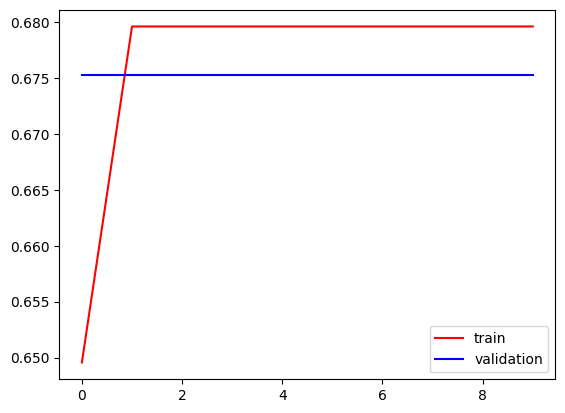

In [ ]:
import matplotlib.pyplot as plt

#ploting accuracy chat
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

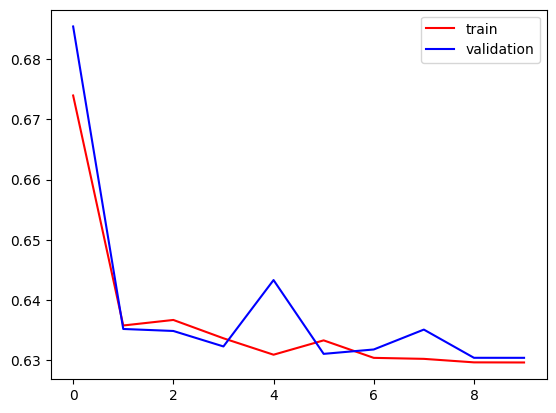

In [ ]:
#ploting loss chat
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()